# STEP 4: Count the number of observations in each ecosystem, during

each month of 2023

Much of the data in GBIF is **crowd-sourced**. As a result, we need not
just the number of observations in each ecosystem each month – we need
to **normalize** by some measure of **sampling effort**. After all, we
wouldn’t expect the same number of observations in the Arctic as we
would in a National Park, even if there were the same number of Veeries.
In this case, we’re normalizing using the average number of observations
for each ecosystem and each month. This should help control for the
number of active observers in each location and time of year.

### Set up your analysis

First things first – let’s load your stored variables.

In [2]:
%store -r

### Identify the ecoregion for each observation

You can combine the ecoregions and the observations **spatially** using
a method called `.sjoin()`, which stands for spatial join.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Check out the <a
href="https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#spatial-joins"><code>geopandas</code>
documentation on spatial joins</a> to help you figure this one out. You
can also ask your favorite LLM (Large-Language Model, like ChatGPT)</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Perform a spatial join</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Identify the correct values for the <code>how=</code> and
<code>predicate=</code> parameters of the spatial join.</li>
<li>Select only the columns you will need for your plot.</li>
<li>Run the code.</li>
</ol></div></div>

In [3]:
gbif_gdf

,month,geometry
gbifID,,
4725400674,9,POINT (-73.97248 40.77155)
4742743075,5,POINT (-85.44625 42.58812)
4837921585,5,POINT (-72.30729 43.70306)
4706255418,7,POINT (-77.73126 48.17427)
4755072666,5,POINT (-72.44836 42.54428)
...,...,...
4841667942,5,POINT (-78.75946 45.0954)
4768698387,7,POINT (-88.02332 48.99255)
4414313551,5,POINT (-72.79677 43.46352)


In [4]:
gdf_ecoregions

,OBJECTID,ECO_NAME,BIOME_NUM,BIOME_NAME,REALM,ECO_BIOME_,NNH,ECO_ID,SHAPE_LENG,SHAPE_AREA,NNH_NAME,COLOR,COLOR_BIO,COLOR_NNH,LICENSE,geometry
ecoregion,,,,,,,,,,,,,,,,
0,1.0,Adelie Land tundra,11.0,Tundra,Antarctica,AN11,1,117,9.749780,0.038948,Half Protected,#63CFAB,#9ED7C2,#257339,CC-BY 4.0,"MULTIPOLYGON (((158.7141 -69.60657, 158.71264 ..."
1,2.0,Admiralty Islands lowland rain forests,1.0,Tropical & Subtropical Moist Broadleaf Forests,Australasia,AU01,2,135,4.800349,0.170599,Nature Could Reach Half Protected,#70A800,#38A700,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((147.28819 -2.57589, 147.2715 -..."
2,3.0,Aegean and Western Turkey sclerophyllous and m...,12.0,"Mediterranean Forests, Woodlands & Scrub",Palearctic,PA12,4,785,162.523044,13.844952,Nature Imperiled,#FF7F7C,#FE0000,#EE1E23,CC-BY 4.0,"MULTIPOLYGON (((26.88659 35.32161, 26.88297 35..."
3,4.0,Afghan Mountains semi-desert,13.0,Deserts & Xeric Shrublands,Palearctic,PA13,4,807,15.084037,1.355536,Nature Imperiled,#FA774D,#CC6767,#EE1E23,CC-BY 4.0,"MULTIPOLYGON (((65.48655 34.71401, 65.52872 34..."
4,5.0,Ahklun and Kilbuck Upland Tundra,11.0,Tundra,Nearctic,NE11,1,404,22.590087,8.196573,Half Protected,#4C82B6,#9ED7C2,#257339,CC-BY 4.0,"MULTIPOLYGON (((-160.26404 58.64097, -160.2673..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,848.0,Sulawesi lowland rain forests,1.0,Tropical & Subtropical Moist Broadleaf Forests,Australasia,AU01,2,156,150.744361,9.422097,Nature Could Reach Half Protected,#70A800,#38A700,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((117.33111 -7.53306, 117.30525 ..."
843,212.0,East African montane forests,1.0,Tropical & Subtropical Moist Broadleaf Forests,Afrotropic,AF01,3,8,157.848926,5.010930,Nature Could Recover,#13ED00,#38A700,#F9A91B,CC-BY 4.0,"MULTIPOLYGON (((36.7375 -3.13, 36.7375 -3.1316..."
844,224.0,Eastern Arc forests,1.0,Tropical & Subtropical Moist Broadleaf Forests,Afrotropic,AF01,3,9,34.153333,0.890325,Nature Could Recover,#267400,#38A700,#F9A91B,CC-BY 4.0,"MULTIPOLYGON (((36.38 -8.96583, 36.38 -8.96667..."


In [5]:
gbif_ecoregion_gdf = (
    gdf_ecoregions
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_gdf,
        how='inner', 
        predicate='contains')
    # Select the required columns
    [['month', 'gbifID', 'SHAPE_AREA']]
     .reset_index()
     .rename(columns={
         'index':'ecoregion',
         'gbifID' : 'observation_id' #needed to reset index to get unquie IDs for every row 
     })
)
gbif_ecoregion_gdf

,ecoregion,month,observation_id,SHAPE_AREA
0,12,5,4743927038,17.133639
1,12,5,4621947377,17.133639
2,12,6,4761090115,17.133639
3,12,7,4765238615,17.133639
4,12,6,4630693711,17.133639
...,...,...,...,...
159532,839,10,4633848077,5.586107
159533,839,9,4749131402,5.586107
159534,839,9,4763942306,5.586107
159535,839,9,4746476478,5.586107


### Count the observations in each ecoregion each month

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Group observations by ecoregion</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>columns_to_group_by</code> with a list of columns.
Keep in mind that you will end up with one row for each group – you want
to count the observations in each ecoregion by month.</li>
<li>Select only month/ecosystem combinations that have more than one
occurrence recorded, since a single occurrence could be an error.</li>
<li>Use the <code>.groupby()</code> and <code>.mean()</code> methods to
compute the mean occurrences by ecoregion and by month.</li>
<li>Run the code – it will normalize the number of occurrences by month
and ecoretion.</li>
</ol></div></div>

In [10]:
occurrence_df = (
    gbif_ecoregion_gdf
    #reset indes
    .reset_index()
    # For each ecoregion, for each month...
    .groupby(['ecoregion', 'month'])
    # ...count the number of occurrences
    #.agg counts all of GBIF Ids in the group 
    .agg(
        occurrences=('observation_id', 'count'),
        area=('SHAPE_AREA', 'first'))  
)
#normalize by area 
occurrence_df['density'] = (
    occurrence_df.occurrences 
    / occurrence_df.area
)

# Get rid of rare observations (possible misidentification?)
occurrence_df = occurrence_df[occurrence_df.occurrences>1]

# Take the mean by ecoregion
mean_occurrences_by_ecoregion = (
    occurrence_df
    .groupby(['ecoregion'])
    .mean()
)
# Take the mean by month
mean_occurrences_by_month = (
    occurrence_df
    .groupby(['month'])
    .mean()
)

In [11]:
occurrence_df


occurrences       area     density
ecoregion month                                    
12        5                2  17.133639    0.116729
          6                2  17.133639    0.116729
          7                2  17.133639    0.116729
16        4                2   7.958751    0.251296
          5             2980   7.958751  374.430624
...                      ...        ...         ...
833       7              293  35.905513    8.160307
          8               40  35.905513    1.114035
          9               11  35.905513    0.306360
839       9               25   5.586107    4.475389
          10               7   5.586107    1.253109

[308 rows x 3 columns]

In [12]:
mean_occurrences_by_month


,occurrences,area,density
month,,,
1,7.666667,71.521667,0.108516
2,7.333333,75.264253,0.087302
3,5.666667,35.252754,0.204116
4,140.472222,11.290958,17.490862
5,1207.169492,20.336924,92.500595
6,1041.571429,25.544896,63.707132
7,572.894737,26.210646,34.124410
8,164.972973,25.862437,11.518052
9,260.897436,19.746055,27.421185


In [13]:
mean_occurrences_by_ecoregion

,occurrences,area,density
ecoregion,,,
12,2.000000,17.133639,0.116729
16,1425.333333,7.958751,179.090084
22,3.000000,3.346216,0.896535
32,930.857143,16.637804,55.948319
33,243.142857,18.674884,13.019779
...,...,...,...
804,6.000000,5.968650,1.005253
827,9.000000,0.610793,14.734931
832,104.500000,4.286144,24.380889


### Normalize the observations

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Normalize</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Divide occurrences by the mean occurrences by month AND the mean
occurrences by ecoregion</li>
</ol></div></div>

In [14]:
# Normalize by space and time for sampling effort
occurrence_df['norm_occurrences'] = (
    occurrence_df['density']
    /mean_occurrences_by_ecoregion['density']
    /mean_occurrences_by_month['density']
)
occurrence_df

occurrences       area     density  norm_occurrences
ecoregion month                                                      
12        5                2  17.133639    0.116729          0.010811
          6                2  17.133639    0.116729          0.015697
          7                2  17.133639    0.116729          0.029305
16        4                2   7.958751    0.251296          0.000080
          5             2980   7.958751  374.430624          0.022602
...                      ...        ...         ...               ...
833       7              293  35.905513    8.160307          0.036475
          8               40  35.905513    1.114035          0.014753
          9               11  35.905513    0.306360          0.001704
839       9               25   5.586107    4.475389          0.056981
          10               7   5.586107    1.253109          0.071383

[308 rows x 4 columns]

<Axes: xlabel='month', ylabel='norm_occurrences'>

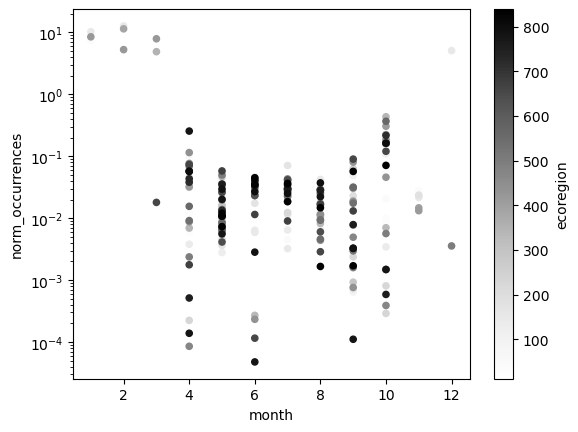

In [15]:
occurrence_df.reset_index().plot.scatter(
    x='month', y='norm_occurrences', c='ecoregion',
    logy=True
)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="2e01613b" class="cell" data-execution_count="9">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store occurrence_df</span></code></pre></div>
</div></div></div>

In [16]:
%store occurrence_df

Stored 'occurrence_df' (DataFrame)
